# Goal:

Analyze World Development

# Scope of the Analysis:

Which countries rank highest and lowest in terms of total Gross Domestic Product (GDP) as per the latest available World Bank data, and how do these extremes correlate with population size, economic structure, and regional development over 20 years?

<li> Data Manipulation Scenarios Handling </li>
<li> Data Visualization to identify growth trends</li>
<li> Submit to Github Repository </li>

# Limitations

Scope of analysis for this project is limited at GDP level

# About the dataset

The World Bank provides data through its World Development Indicators platform. This project uses indicators such as GDP (current US$) and population for over 200 countries from 2000 to 2023. The dataset was sourced from data.worldbank.org



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import zipfile
import io
import re


In [3]:
# Set Variables
# Indicators
indicators = {
    "GDP": "NY.GDP.MKTP.CD",  # GDP (current US$)
    "Population": "SP.POP.TOTL"
}

# Date Range
start_year = 2000
end_year = 2023

In [5]:
# Function to download data
def get_world_bank_data(indicator):
    url = f"http://api.worldbank.org/v2/en/indicator/{indicator}?downloadformat=csv"
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    data_file = [name for name in z.namelist() if name.endswith('.csv') and 'Metadata' not in name][0]
    df = pd.read_csv(z.open(data_file), header=2)
    df = df.rename(columns={"Country Name": "Country"})
    df = df.loc[:, ['Country'] + [str(y) for y in range(start_year, end_year+1)]]
    df = df.set_index("Country")
    return df


In [8]:
# Fetch data
gdp_df = get_world_bank_data(indicators["GDP"])
pop_df = get_world_bank_data(indicators["Population"])

In [10]:
gdp_df.shape

(266, 24)

<b> Data Manipulation Scenario: </b> The dataset had missing values causing 
<p>
<b> Solution: </b> Fetch these rows to see what is missing and decide if imputing is possible or removing these rows from dataset


In [30]:
gdp_df[gdp_df.isna().any(axis = 1)]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
American Samoa,NaN,NaN,5.120000e+08,5.240000e+08,5.090000e+08,5.000000e+08,4.930000e+08,5.180000e+08,5.600000e+08,6.750000e+08,...,6.430000e+08,6.730000e+08,6.710000e+08,6.120000e+08,6.390000e+08,6.470000e+08,7.210000e+08,7.500000e+08,8.710000e+08,NaN
Bhutan,4.607334e+08,4.961102e+08,5.593453e+08,6.519354e+08,7.353485e+08,8.603910e+08,9.428799e+08,1.255768e+09,1.317518e+09,1.331344e+09,...,2.089080e+09,2.187816e+09,2.357505e+09,2.591358e+09,2.583336e+09,2.735684e+09,2.457604e+09,2.768803e+09,2.898228e+09,NaN
Channel Islands,6.439703e+09,6.232906e+09,6.663669e+09,7.332245e+09,8.553643e+09,8.827273e+09,9.676173e+09,1.151461e+10,NaN,9.100756e+09,...,1.052849e+10,1.010997e+10,9.169278e+09,9.170080e+09,1.002615e+10,1.003244e+10,9.439811e+09,1.115700e+10,1.130830e+10,1.250793e+10
Cuba,3.056540e+10,3.168240e+10,3.359050e+10,3.590120e+10,3.820300e+10,4.264384e+10,4.883593e+10,5.426287e+10,5.630213e+10,5.748148e+10,...,8.065610e+10,8.713280e+10,9.137041e+10,9.685065e+10,1.000500e+11,1.034276e+11,1.073518e+11,NaN,NaN,NaN
Cayman Islands,NaN,NaN,NaN,NaN,NaN,NaN,4.200288e+09,4.466278e+09,4.585949e+09,4.281715e+09,...,4.562854e+09,4.708167e+09,4.909322e+09,5.166281e+09,5.530178e+09,5.941897e+09,5.655358e+09,6.060027e+09,6.600844e+09,7.139429e+09
Eritrea,7.063708e+08,7.523717e+08,7.293217e+08,8.702483e+08,1.109054e+09,1.098425e+09,1.211162e+09,1.317974e+09,1.380189e+09,1.856696e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gibraltar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greenland,1.068025e+09,1.086171e+09,1.169137e+09,1.558760e+09,1.822500e+09,1.849803e+09,2.013107e+09,2.249811e+09,2.499092e+09,2.529964e+09,...,2.842066e+09,2.499113e+09,2.707140e+09,2.851614e+09,3.055782e+09,2.997310e+09,3.082885e+09,3.235810e+09,NaN,NaN
Guam,NaN,NaN,3.394000e+09,3.569000e+09,3.869000e+09,4.213000e+09,4.238000e+09,4.397000e+09,4.658000e+09,4.828000e+09,...,5.610000e+09,5.799000e+09,5.901000e+09,6.013000e+09,6.051000e+09,6.355000e+09,5.916000e+09,6.234000e+09,6.910000e+09,NaN


In [32]:
## Dropping these rows as GDP cannot be imputed at this point
gdp_df = gdp_df.dropna(how='all')

In [34]:
gdp_df.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,1.873453e+09,1.896457e+09,1.961844e+09,2.044112e+09,2.254831e+09,2.360017e+09,2.469783e+09,2.677641e+09,2.843025e+09,2.553793e+09,...,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09
Africa Eastern and Southern,2.872017e+11,2.609922e+11,2.678150e+11,3.557164e+11,4.426962e+11,5.166611e+11,5.802408e+11,6.655987e+11,7.135021e+11,7.154853e+11,...,9.787083e+11,8.982778e+11,8.289428e+11,9.729989e+11,1.012306e+12,1.009721e+12,9.333918e+11,1.085745e+12,1.191423e+12,1.245472e+12
Afghanistan,3.521418e+09,2.813572e+09,3.825701e+09,4.520947e+09,5.224897e+09,6.203257e+09,6.971758e+09,9.747886e+09,1.010930e+10,1.241615e+10,...,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10
Africa Western and Central,1.421401e+11,1.500585e+11,1.793901e+11,2.077550e+11,2.569078e+11,3.133275e+11,3.981397e+11,4.668837e+11,5.693217e+11,5.099177e+11,...,8.974157e+11,7.717669e+11,6.943610e+11,6.878492e+11,7.704950e+11,8.264838e+11,7.898017e+11,8.493124e+11,8.839739e+11,7.991060e+11
Angola,9.129595e+09,8.936079e+09,1.528559e+10,1.781270e+10,2.355206e+10,3.697090e+10,5.238103e+10,6.526642e+10,8.853867e+10,7.030720e+10,...,1.359668e+11,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.482465e+10


<b>Data Manipulation Scenario:</b> Filtering Issue arises as Country is the index here and we cannot filter on index directly <p>
<b>Resolution:</b> Reset Index to get the column.


In [37]:
gdp_df = gdp_df.reset_index()


In [39]:
gdp_df[gdp_df['Country'] == 'India']


,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
108,India,4.683955e+11,4.854401e+11,5.149391e+11,6.077007e+11,7.091527e+11,8.203838e+11,9.402599e+11,1.216736e+12,1.198895e+12,...,2.039126e+12,2.103588e+12,2.294797e+12,2.651474e+12,2.702930e+12,2.835606e+12,2.674852e+12,3.167271e+12,3.353470e+12,3.567552e+12


<b> Data Manipulation Scenario:</b> GDP values are large numbers with scientific notation. This is a big formatting and readability issue.
<p>
<b> Resolution: </b> For all year columns, loop all columns except country column. Now use the column variable and Divide by one billion (1e9) 

In [42]:
year_cols = [col for col in gdp_df.columns if col != 'Country']
gdp_df[year_cols] = gdp_df[year_cols] / 1e9


In [44]:
gdp_df.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,1.873453,1.896457,1.961844,2.044112,2.254831,2.360017,2.469783,2.677641,2.843025,...,2.790850,2.962907,2.983635,3.092429,3.276184,3.395799,2.481857,2.929447,3.279344,3.648573
1,Africa Eastern and Southern,287.201651,260.992228,267.815037,355.716369,442.696186,516.661066,580.240750,665.598701,713.502106,...,978.708261,898.277807,828.942805,972.998927,1012.306000,1009.721174,933.391782,1085.745179,1191.423176,1245.472472
2,Afghanistan,3.521418,2.813572,3.825701,4.520947,5.224897,6.203257,6.971758,9.747886,10.109297,...,20.497129,19.134222,18.116572,18.753456,18.053223,18.799444,19.955929,14.259995,14.497244,17.233052
3,Africa Western and Central,142.140076,150.058483,179.390065,207.754987,256.907774,313.327532,398.139656,466.883688,569.321672,...,897.415713,771.766914,694.360980,687.849197,770.494988,826.483770,789.801652,849.312422,883.973911,799.105950
4,Angola,9.129595,8.936079,15.285592,17.812705,23.552058,36.970901,52.381025,65.266415,88.538665,...,135.966803,90.496421,52.761617,73.690155,79.450688,70.897963,48.501561,66.505130,104.399747,84.824654


<b>Data Manipulation Scenario:</b> Years in wide format is not ideal for analysis and have many limitations, like ; <li> Cannot filter <li>Cannot groupby <li> Difficult to plot 
<p>
<b> Resolution: </b> Melt the dataset from wide format to long format. Rule of thumb for tidy data is <li> One column : One Variable </li>
<li> One row : One Observation </li>
<li> One table : One type of observation </li>

In [47]:
## Give me a list of all column names in gdp_df except the one named 'Country'.
year_cols = [col for col in gdp_df.columns if col != 'Country']

In [49]:
gdp_df_long = pd.melt(gdp_df, id_vars = 'Country', value_vars = year_cols, var_name = 'Year', value_name = 'GDP (Billion usd)')

In [51]:
gdp_df_long[gdp_df_long['Country'] == 'India']

,Country,Year,GDP (Billion usd)
108,India,2000,468.395522
370,India,2001,485.440139
632,India,2002,514.939140
894,India,2003,607.700687
1156,India,2004,709.152729
1418,India,2005,820.383764
1680,India,2006,940.259889
1942,India,2007,1216.736439
2204,India,2008,1198.895139
2466,India,2009,1341.888017


In [53]:
## Total country count
gdp_df_long.Country.nunique()

262

# Solve using RegEx Pattern

<b>Data Manipulation Scenario:</b> There are 262 Countries, and searching can be challenging 
<p>
<b> Solution: </b> Use regular expressions

In [58]:
# Countries that start with 'A'
gdp_df_long[gdp_df_long['Country'].str.match(r'^A')]


,Country,Year,GDP (Billion usd)
0,Aruba,2000,1.873453
1,Africa Eastern and Southern,2000,287.201651
2,Afghanistan,2000,3.521418
3,Africa Western and Central,2000,142.140076
4,Angola,2000,9.129595
...,...,...,...
6038,Antigua and Barbuda,2023,2.033085
6039,Australia,2023,1728.057317
6040,Austria,2023,511.685204
6041,Azerbaijan,2023,72.356176


In [60]:
# Countries starting with 'A' or 'B'
gdp_df_long[gdp_df_long['Country'].str.match(r'^[AB]')]

,Country,Year,GDP (Billion usd)
0,Aruba,2000,1.873453
1,Africa Eastern and Southern,2000,287.201651
2,Afghanistan,2000,3.521418
3,Africa Western and Central,2000,142.140076
4,Angola,2000,9.129595
...,...,...,...
6056,Barbados,2023,6.720733
6057,Brunei Darussalam,2023,15.128293
6058,Bhutan,2023,NaN
6059,Botswana,2023,19.396084


## Regex [Only strings which have digit length = 4]  -----> r'^\d{4,}'

## Numeric Column

In [64]:
# Match GDPs over a trillion (1,000+) 
# If GDP was string like "1234 Billion USD", extract rows where first number is 4 digits+
gdp_df_long[gdp_df_long['GDP (Billion usd)'].astype(str).str.match(r'^\d{4,}')]

,Country,Year,GDP (Billion usd)
40,China,2000,1211.331652
55,Germany,2000,1966.980701
61,East Asia & Pacific (excluding high income),2000,1736.183129
62,Early-demographic dividend,2000,3377.596808
63,East Asia & Pacific,2000,8377.973566
...,...,...,...
6264,Sub-Saharan Africa (IDA & IBRD countries),2023,2044.578422
6267,Turkiye,2023,1118.252964
6272,Upper middle income,2023,29440.021019
6274,United States,2023,27720.709000


## String Column - filter based on length of characters  ------> r'^\w{3,}'

In [67]:
gdp_df_long[gdp_df_long['Country'].str.match(r'^\w{14,}')]

,Country,Year,GDP (Billion usd)


## Filter countries with 2 or more words

In [70]:
gdp_df_long[gdp_df_long['Country'].str.match(r'^\w+\s\w+')]

,Country,Year,GDP (Billion usd)
1,Africa Eastern and Southern,2000,287.201651
3,Africa Western and Central,2000,142.140076
7,Arab World,2000,763.411636
8,United Arab Emirates,2000,104.337372
11,American Samoa,2000,NaN
...,...,...,...
6272,Upper middle income,2023,29440.021019
6274,United States,2023,27720.709000
6278,Virgin Islands (U.S.),2023,NaN
6279,Viet Nam,2023,429.716969


## GDP Comparison USA and India

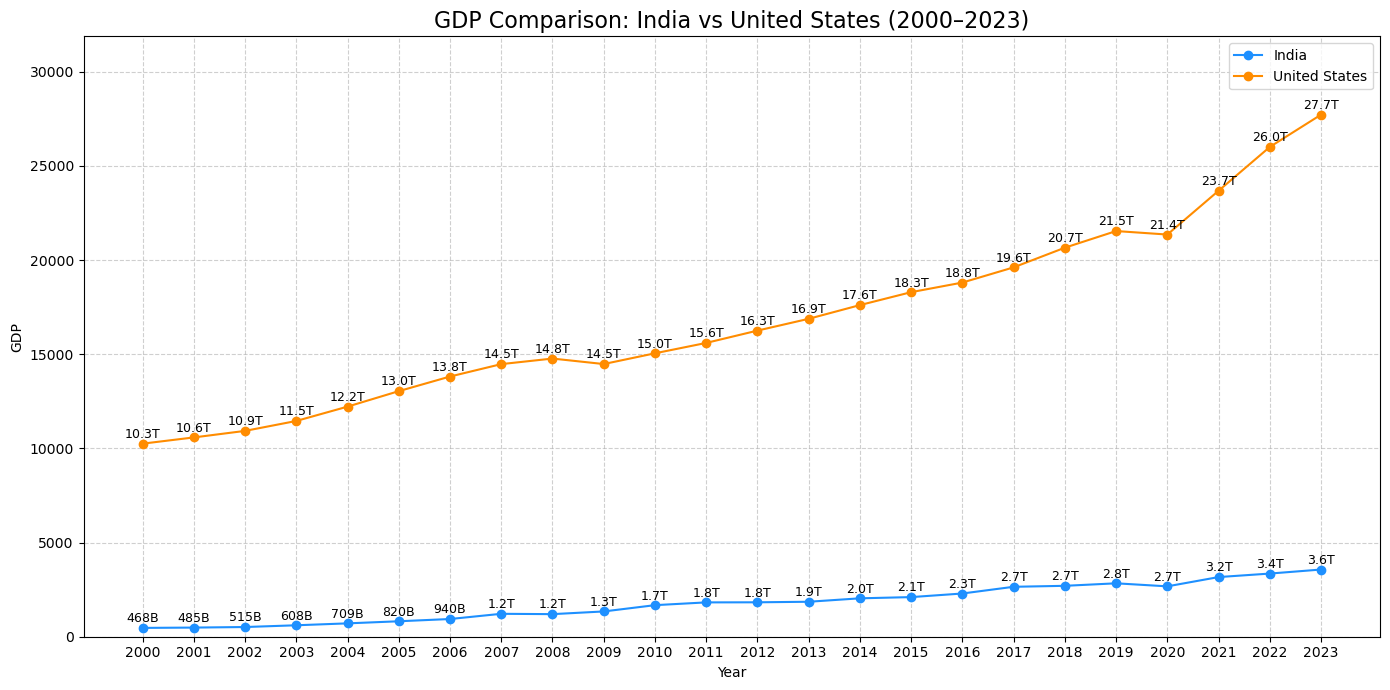

In [80]:

# Filter India and USA
gdp_filtered = gdp_df_long[gdp_df_long['Country'].isin(['India', 'United States'])]

# Setup plot
plt.figure(figsize=(14, 7))

# Plot each country
for country, color in zip(['India', 'United States'], ['dodgerblue', 'darkorange']):
    data = gdp_filtered[gdp_filtered['Country'] == country]
    plt.plot(data['Year'], data['GDP (Billion usd)'], marker='o', label=country, color=color)
    
    # Annotate with formatted labels (e.g., 3.5T)
    for i in range(len(data)):
        x = data.iloc[i]['Year']
        y = data.iloc[i]['GDP (Billion usd)']
        if y >= 1000:
            label = f'{y/1000:.1f}T'  # Convert to trillions
        else:
            label = f'{y:.0f}B'
        plt.text(x, y + 300, label, fontsize=9, ha='center')  # +300 padding

# Add extra space above the tallest value to prevent clipping
max_gdp = gdp_filtered['GDP (Billion usd)'].max()
plt.ylim(0, max_gdp * 1.15)  # 15% buffer

# Chart settings
plt.title('GDP Comparison: India vs United States (2000–2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


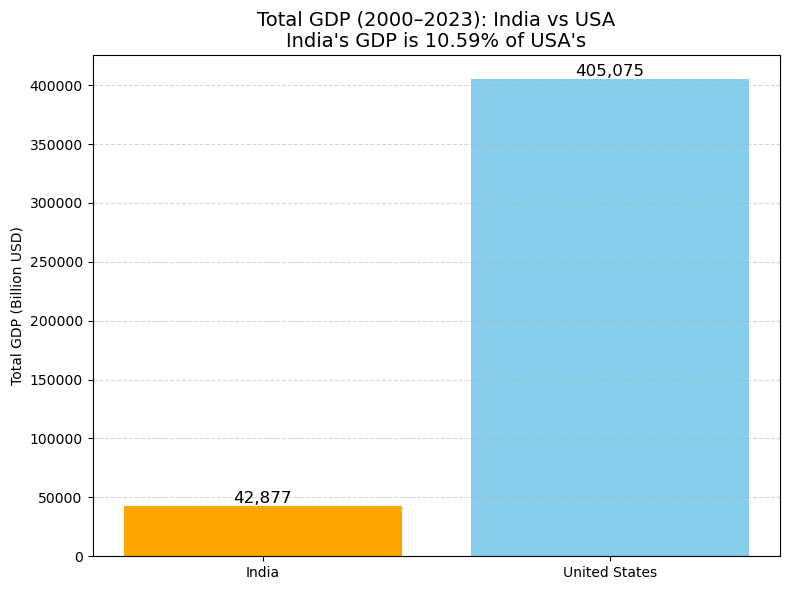

In [78]:
import matplotlib.pyplot as plt

# Step 1: Filter data for India and USA
countries = ['India', 'United States']
gdp_totals = gdp_df_long[gdp_df_long['Country'].isin(countries)]

# Step 2: Sum GDP over all years
total_gdp_by_country = gdp_totals.groupby('Country')['GDP (Billion usd)'].sum()

# Step 3: Calculate India's share of USA GDP
india_gdp = total_gdp_by_country['India']
usa_gdp = total_gdp_by_country['United States']
india_share = (india_gdp / usa_gdp) * 100

# Step 4: Plot bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(total_gdp_by_country.index, total_gdp_by_country.values, color=['orange', 'skyblue'])

# Annotate values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=12)

# Add India share text
plt.title(f"Total GDP (2000–2023): India vs USA\nIndia's GDP is {india_share:.2f}% of USA's", fontsize=14)
plt.ylabel('Total GDP (Billion USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [82]:
# Step 1: Filter for India and USA
gdp_filtered = gdp_df_long[gdp_df_long['Country'].isin(['India', 'United States'])].copy()

# Step 2: Sort by Country and Year
gdp_filtered = gdp_filtered.sort_values(['Country', 'Year'])

# Step 3: Calculate Year-over-Year growth rate
gdp_filtered['Growth Rate (%)'] = gdp_filtered.groupby('Country')['GDP (Billion usd)'].pct_change() * 100

# Step 4: Round for better readability
gdp_filtered['Growth Rate (%)'] = gdp_filtered['Growth Rate (%)'].round(2)

# Step 5: View result for India and USA
gdp_filtered[gdp_filtered['Country'] == 'India'].head(10)  # or 'United States'


,Country,Year,GDP (Billion usd),Growth Rate (%)
108,India,2000,468.395522,NaN
370,India,2001,485.440139,3.64
632,India,2002,514.939140,6.08
894,India,2003,607.700687,18.01
1156,India,2004,709.152729,16.69
1418,India,2005,820.383764,15.69
1680,India,2006,940.259889,14.61
1942,India,2007,1216.736439,29.40
2204,India,2008,1198.895139,-1.47
2466,India,2009,1341.888017,11.93


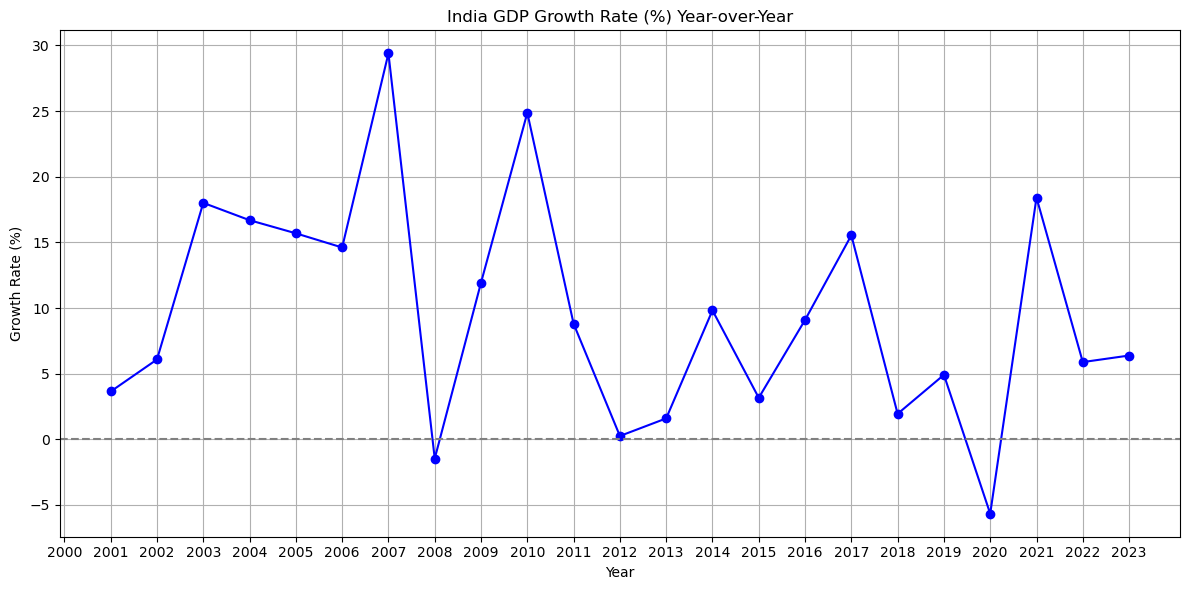

In [84]:
import matplotlib.pyplot as plt

# Plot GDP growth for India
india_growth = gdp_filtered[gdp_filtered['Country'] == 'India']
plt.figure(figsize=(12,6))
plt.plot(india_growth['Year'], india_growth['Growth Rate (%)'], marker='o', label='India', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("India GDP Growth Rate (%) Year-over-Year")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [86]:
# Reuse the filtered and growth-calculated DataFrame
india_avg_growth = gdp_filtered[gdp_filtered['Country'] == 'India']['Growth Rate (%)'].mean()
usa_avg_growth = gdp_filtered[gdp_filtered['Country'] == 'United States']['Growth Rate (%)'].mean()

print(f"🇮🇳 Average GDP Growth Rate for India (2001–2023): {india_avg_growth:.2f}%")
print(f"🇺🇸 Average GDP Growth Rate for USA (2001–2023): {usa_avg_growth:.2f}%")


🇮🇳 Average GDP Growth Rate for India (2001–2023): 9.55%
🇺🇸 Average GDP Growth Rate for USA (2001–2023): 4.46%


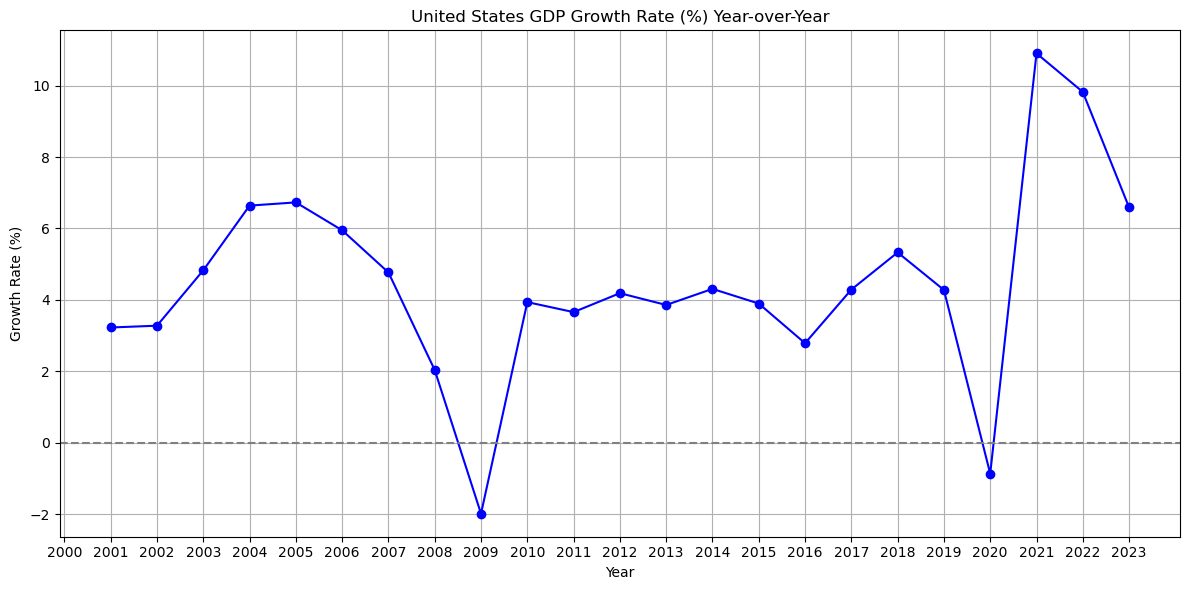

In [95]:
import matplotlib.pyplot as plt

# Plot GDP growth for United States
unitedstates_growth = gdp_filtered[gdp_filtered['Country'] == 'United States']
plt.figure(figsize=(12,6))
plt.plot(unitedstates_growth['Year'], unitedstates_growth['Growth Rate (%)'], marker='o', label='United States', color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("United States GDP Growth Rate (%) Year-over-Year")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()



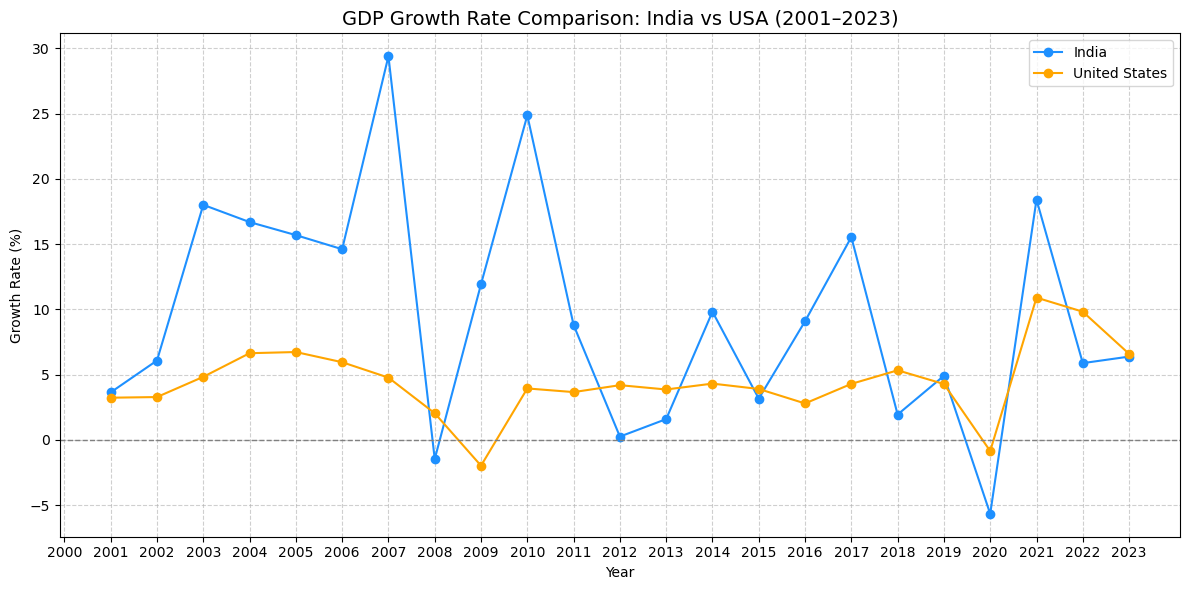

In [99]:

# Filter India and USA
growth_data = gdp_filtered[gdp_filtered['Country'].isin(['India', 'United States'])]

# Setup the plot
plt.figure(figsize=(12, 6))

# Plot for each country
for country, color in zip(['India', 'United States'], ['dodgerblue', 'orange']):
    country_data = growth_data[growth_data['Country'] == country]
    plt.plot(
        country_data['Year'], 
        country_data['Growth Rate (%)'], 
        marker='o', 
        label=country, 
        color=color
    )

# Chart styling
plt.title("GDP Growth Rate Comparison: India vs USA (2001–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [101]:
# Step 1: Create a pivot to compare side-by-side
pivot_growth = gdp_filtered.pivot(index='Year', columns='Country', values='Growth Rate (%)')

# Step 2: Calculate difference
pivot_growth['Difference'] = abs(pivot_growth['India'] - pivot_growth['United States'])

# Step 3: Find years where difference <= 1%
similar_years = pivot_growth[pivot_growth['Difference'] <= 1].reset_index()
print(similar_years[['Year', 'India', 'United States', 'Difference']])


Country  Year  India  United States  Difference
0        2001   3.64           3.23        0.41
1        2015   3.16           3.90        0.74
2        2019   4.91           4.28        0.63
3        2023   6.38           6.59        0.21


## Growth Rate Crossover
Let’s find out which years India and USA had similar GDP growth rates, and then highlight those years on a chart.



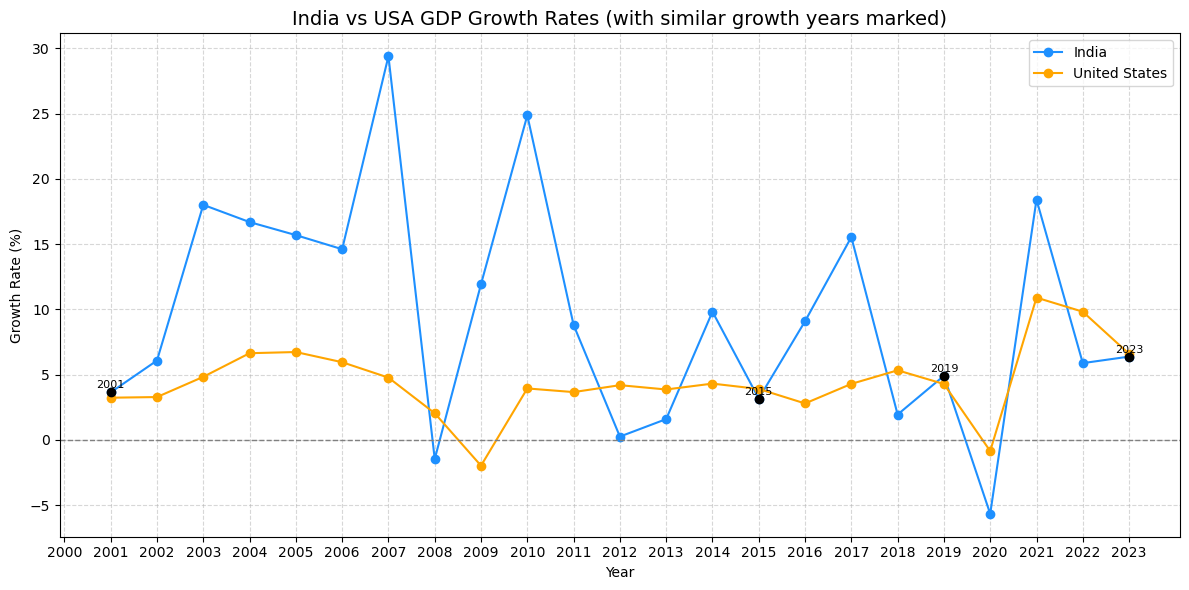

In [103]:
import matplotlib.pyplot as plt

# Step 1: Line chart for both countries
plt.figure(figsize=(12,6))
plt.plot(pivot_growth.index, pivot_growth['India'], label='India', color='dodgerblue', marker='o')
plt.plot(pivot_growth.index, pivot_growth['United States'], label='United States', color='orange', marker='o')

# Step 2: Highlight similar growth years
for _, row in similar_years.iterrows():
    year = row['Year']
    india_val = row['India']
    usa_val = row['United States']
    
    # Mark on chart
    plt.plot(year, india_val, 'ko')  # black circle
    plt.text(year, india_val + 0.3, f'{year}', ha='center', fontsize=8, color='black')

# Step 3: Style chart
plt.title("India vs USA GDP Growth Rates (with similar growth years marked)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
